## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image, display

## Loading datasets

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train=train.set_index('PassengerId')
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Identifyng datatypes
datadict=pd.DataFrame(train.dtypes)
datadict

,0
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


In [6]:
train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [7]:
# Identifying number of missing values and unique values
datadict['MissingVal']=train.isnull().sum()
datadict['UniqueVal']=train.nunique()
datadict['Count']=train.count()
datadict

,0,MissingVal,UniqueVal,Count
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891
Cabin,object,687,147,204


In [8]:
# Discriptive statistics on datatype- object
train.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [9]:
# Discriptive statistics on datatype- number
train.describe(include=['number'])

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Univariate and multivariate analysis

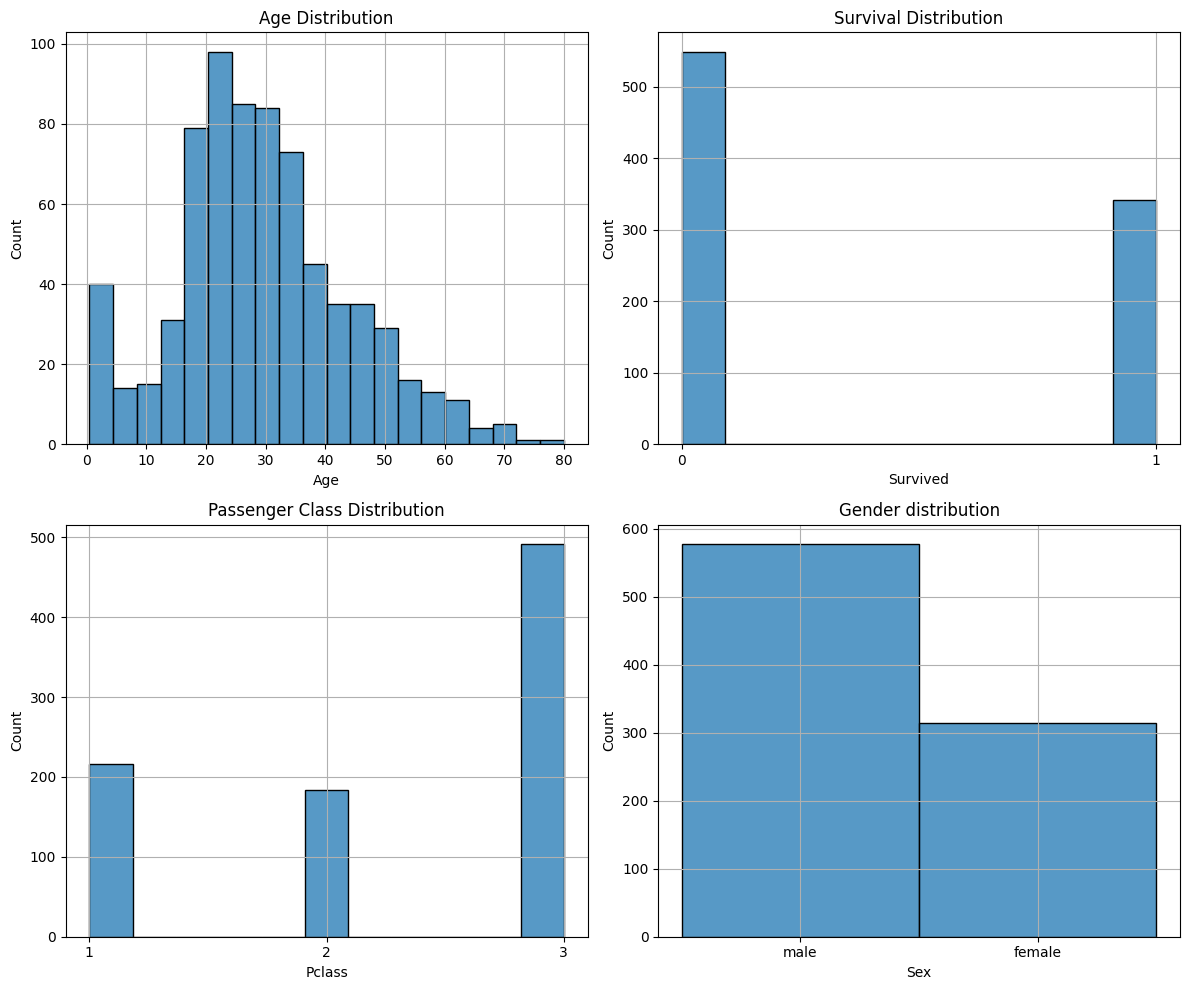

In [10]:
fig,axes = plt.subplots(2,2, figsize=(12,10))
sns.histplot(train['Age'].dropna(), ax=axes[0,0])
axes[0,0].set_title('Age Distribution')
axes[0,0].grid(True)

sns.histplot(train['Survived'], ax=axes[0, 1])
axes[0, 1].set_title('Survival Distribution')
axes[0, 1].set_xticks([0, 1])
axes[0, 1].grid(True)

sns.histplot(train['Pclass'], ax=axes[1, 0])
axes[1, 0].set_title('Passenger Class Distribution')
axes[1, 0].set_xticks([1, 2, 3])
axes[1, 0].grid(True)

sns.histplot(train['Sex'], ax=axes[1, 1])
axes[1, 1].set_title('Gender distribution')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

### There is a relationship between Pclass and the survival by referring to the plot below. Passengers on Pclass1 had a better survial rate of approx 60% whereas passengers on pclass3 had the worst survial rate of approx 22%

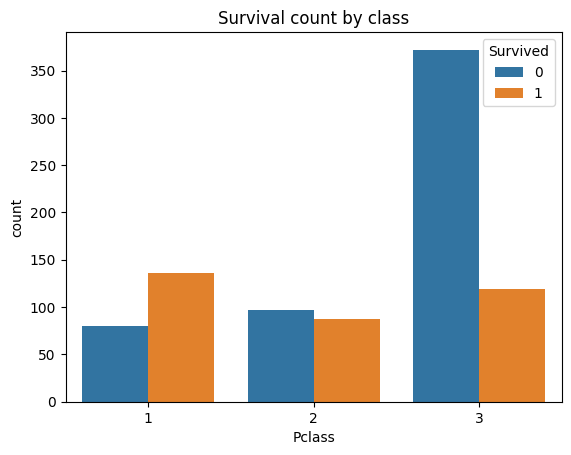

In [11]:
# Relation between survival and Pclass
ax = sns.countplot(x='Pclass', hue='Survived', data=train)
ax.set_title('Survival count by class')
plt.show()

### We can see that survial rates is greater in adult age range as compared to older people and children. This tells us that age has a connection with survival rates.

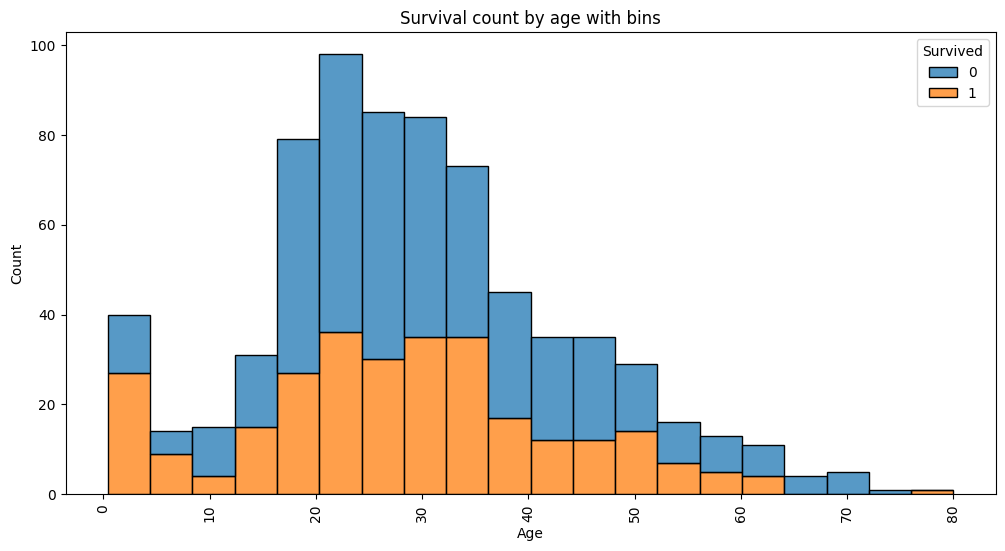

In [12]:
# Relation between survival and age
train_cleaned = train.dropna(subset=['Age'])
plt.figure(figsize=(12,6))
ax1 = sns.histplot(x='Age', hue='Survived', data=train_cleaned, multiple='stack', bins=20)
ax1.set_title('Survival count by age with bins')
plt.xticks(rotation=90)
plt.show()

### We can clearly see that male survial rates is around 20% where as female survial rate is about 75% which suggests that gender has a strong relationship with the survival rates.

<Figure size 1200x600 with 0 Axes>

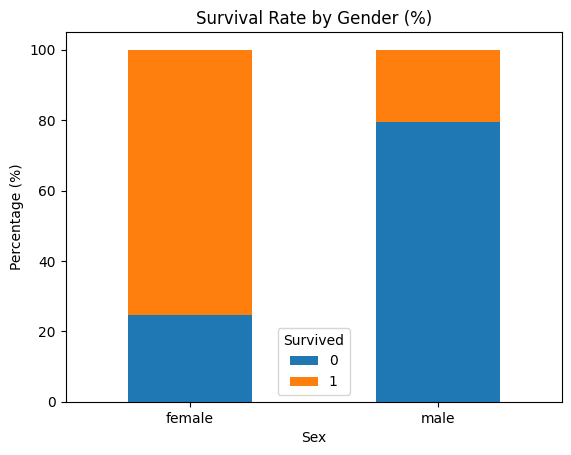

In [13]:
# Relation between survival and gender
# Calculate survival rate by gender
survival_rate = train_cleaned.groupby('Sex')['Survived'].value_counts(normalize=True).unstack() * 100

# Plotting
plt.figure(figsize=(12,6))
survival_rate.plot(kind='bar', stacked=True)
plt.title('Survival Rate by Gender (%)')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.show()

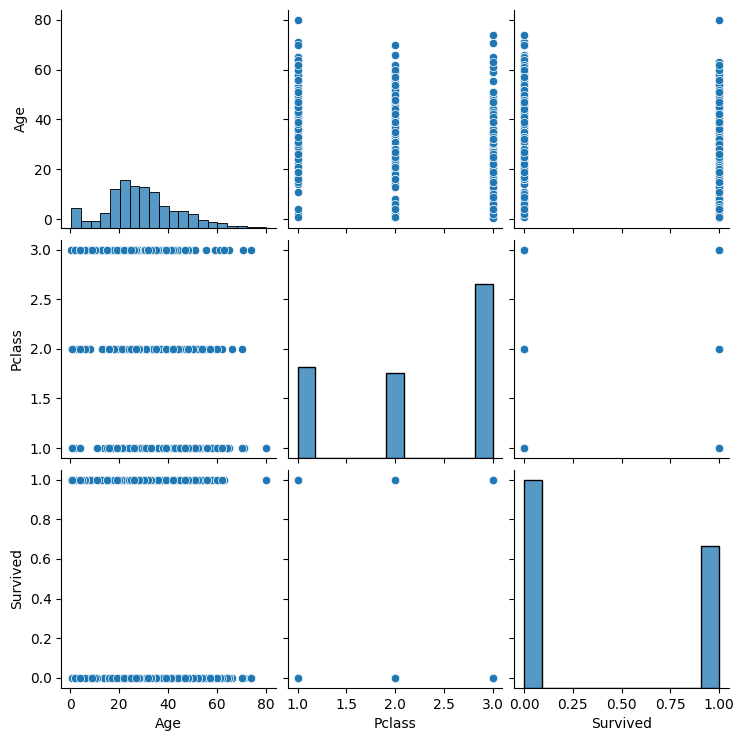

In [14]:
sns.pairplot(train_cleaned[['Age', 'Pclass', 'Survived']])
plt.show()

### Multivariate Analysis
#### There is a positve coorelation between Fare and Survived and a negative coorelation between Pclass and Surived
#### There is a negative coorelation between Fare and Pclass, Age and Plcass

<Axes: >

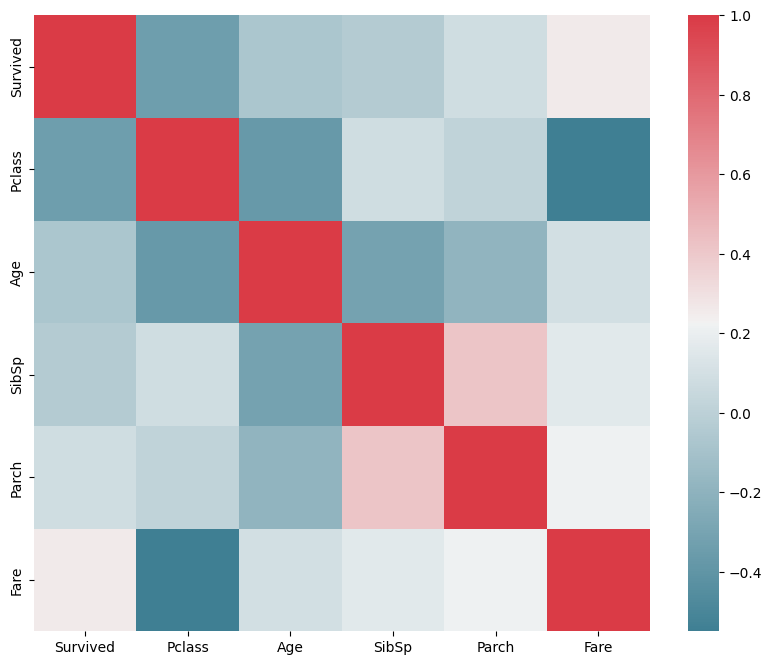

In [15]:
f, ax = plt.subplots(figsize=(10, 8))
numeric_data = train.select_dtypes(include=[np.number])
corr = numeric_data.corr()
sns.heatmap(corr,
            mask=np.zeros_like(corr, dtype=np.bool_), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)